In [1]:
import pandas as pd
import numpy as np


In [20]:
df0 = pd.read_csv("../scripts/data/riobusdata_dublin.csv") # Traj
df1 = pd.read_csv("../scripts/data/gmvsae_dublin_results.csv") # Traj
df2 = pd.read_csv("../scripts/data/transformer_dublin.csv")

df0.columns = ["rota", "auc", "thr", "max_f1", "f1_thr", "prec", "rec", "traj"]
df1.columns = ["auc", "thr", "max_f1", "f1_thr", "prec", "rec", "rota", "traj"]
df2.columns = ["rota", "auc", "thr", "max_f1", "f1_thr", "prec", "rec"]

dfs = [df0, df1, df2]
for df in dfs:
    for col in  ["prec", "rec", "thr"]:
        df[col] = df[col].apply(lambda x : x[1:-1].split(' '))
        df["_"+col] = df[col].apply(lambda x : [float(y) for y in x if y])   

In [24]:
df2

,rota,auc,thr,max_f1,f1_thr,prec,rec,_prec,_rec,_thr
0,40,1.000000,"[0.99519229, 1., , , , , , , , ]",1.000000,0.995192,"[1., 1., 1.]","[1., , , 0.92, 0., , ]","[1.0, 1.0, 1.0]","[1.0, 0.92, 0.0]","[0.99519229, 1.0]"
1,37,1.000000,"[0.99346405, 0.9937107, , 0.99447513, 0.994565...",1.000000,0.993464,"[1., 1., 1., 1., 1., 1., 1.]","[1., , , 0.98, 0.96, 0.94, 0.92, 0.9, , 0., , ]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 0.98, 0.96, 0.94, 0.92, 0.9, 0.0]","[0.99346405, 0.9937107, 0.99447513, 0.99456519..."
2,18,1.000000,"[0.99206346, 0.99280578, 0.99346405, 0.9936305...",1.000000,0.992063,"[1., 1., 1., 1., 1., 1., 1., 1.]","[1., , , 0.98, 0.96, 0.94, 0.92, 0.9, , 0.88, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 0.98, 0.96, 0.94, 0.92, 0.9, 0.88, 0.0]","[0.99206346, 0.99280578, 0.99346405, 0.9936305..."
3,4,1.000000,"[0.99519229, 1., , , , , , , , ]",1.000000,0.995192,"[1., 1., 1.]","[1., , , 0.64, 0., , ]","[1.0, 1.0, 1.0]","[1.0, 0.64, 0.0]","[0.99519229, 1.0]"
4,64,1.000000,"[0.99253732, 0.99333334, 0.99337751, 0.9943502...",1.000000,0.992537,"[1., 1., 1., 1., 1., 1., 1., 1.]","[1., , , 0.98, 0.96, 0.94, 0.92, 0.9, , 0.88, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 0.98, 0.96, 0.94, 0.92, 0.9, 0.88, 0.0]","[0.99253732, 0.99333334, 0.99337751, 0.9943502..."
...,...,...,...,...,...,...,...,...,...,...
63,2,0.999223,"[0.921875, , , 0.94711536, 0.98550725, 0.99270...",0.989899,0.992701,"[0.96153846, 0.96078431, 0.98, , , , , , , 1.,...","[1., , , 0.98, 0.98, 0.98, 0.96, 0.94, 0.92, 0...","[0.96153846, 0.96078431, 0.98, 1.0, 1.0, 1.0, ...","[1.0, 0.98, 0.98, 0.98, 0.96, 0.94, 0.92, 0.9,...","[0.921875, 0.94711536, 0.98550725, 0.99270076,..."
64,34,1.000000,"[0.99519229, 1., , , , , , , , ]",1.000000,0.995192,"[1., 1., 1.]","[1., , , 0.72, 0., , ]","[1.0, 1.0, 1.0]","[1.0, 0.72, 0.0]","[0.99519229, 1.0]"
65,6,0.965929,"[0.97989953, 0.98795182, 0.99082571, 0.9918032...",0.970874,0.979900,"[0.94339623, 0.94230769, 0.94117647, 0.94, , ,...","[1., , , 0.98, 0.96, 0.94, 0.92, 0.9, , 0., , ]","[0.94339623, 0.94230769, 0.94117647, 0.94, 0.9...","[1.0, 0.98, 0.96, 0.94, 0.92, 0.9, 0.0]","[0.97989953, 0.98795182, 0.99082571, 0.9918032..."
66,52,1.000000,"[0.99492383, 0.99519229, 1., , , , , , , , ]",1.000000,0.994924,"[1., 1., 1., 1.]","[1., , , 0.98, 0.9, , 0., , ]","[1.0, 1.0, 1.0, 1.0]","[1.0, 0.98, 0.9, 0.0]","[0.99492383, 0.99519229, 1.0]"


/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fc80edd4fd0> has a label of '_prec' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fc80edb9b90> has a label of '_prec' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fc80eebdd90> has a label of '_prec' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


<AxesSubplot:xlabel='_rec'>

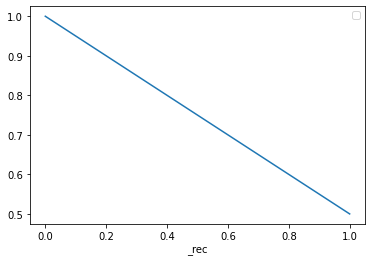

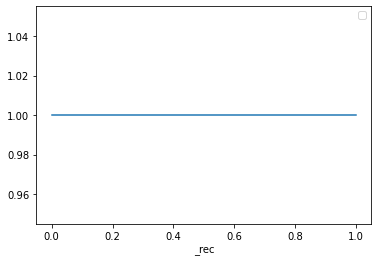

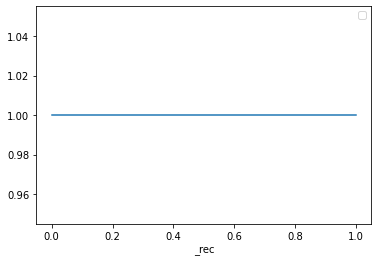

In [25]:
_df = df0[df1["rota"] == 0].explode(["_prec", "_rec"])
_df.plot("_rec", "_prec")
_df = df1[df1["rota"] == 0].explode(["_prec", "_rec"])
_df.plot("_rec", "_prec")
_df = df2[df1["rota"] == 0].explode(["_prec", "_rec"])
_df.plot("_rec", "_prec")

,rota,auc,thr,max_f1,f1_thr,prec,rec,traj,_prec,_rec,_thr
0,0,0.750000,[1.],0.666667,1.0,"[0.5, 1., ]","[1., 0.]","[[[53.428017000000004, -6.242033], [53.4280170...","[0.5, 1.0]","[1.0, 0.0]",[1.0]
1,1,0.750000,[1.],0.666667,1.0,"[0.5, 1., ]","[1., 0.]","[[[53.324721999999994, -6.42614], [53.32812900...","[0.5, 1.0]","[1.0, 0.0]",[1.0]
2,2,0.750000,[1.],0.666667,1.0,"[0.5, 1., ]","[1., 0.]","[[[53.2463, -6.128867], [53.2463, -6.128867], ...","[0.5, 1.0]","[1.0, 0.0]",[1.0]
3,3,0.750000,[1.],0.666667,1.0,"[0.5, 1., ]","[1., 0.]","[[[53.345249, -6.234285], [53.3461, -6.24009],...","[0.5, 1.0]","[1.0, 0.0]",[1.0]
4,4,0.750000,[1.],0.666667,1.0,"[0.5, 1., ]","[1., 0.]","[[[53.412716, -6.2653], [53.410191000000005, -...","[0.5, 1.0]","[1.0, 0.0]",[1.0]
...,...,...,...,...,...,...,...,...,...,...,...
63,63,0.750000,[1.],0.666667,1.0,"[0.5, 1., ]","[1., 0.]","[[[53.357967, -6.382867], [53.357967, -6.38286...","[0.5, 1.0]","[1.0, 0.0]",[1.0]
64,64,0.750000,[1.],0.666667,1.0,"[0.5, 1., ]","[1., 0.]","[[[53.321631999999994, -6.3316], [53.321617, -...","[0.5, 1.0]","[1.0, 0.0]",[1.0]
65,65,0.755102,[1.],0.675676,1.0,"[0.51020408, 1., , , , , , , , ]","[1., 0.]","[[[53.292435, -6.2458], [53.292435, -6.2458], ...","[0.51020408, 1.0]","[1.0, 0.0]",[1.0]
66,66,0.750000,[1.],0.666667,1.0,"[0.5, 1., ]","[1., 0.]","[[[53.271137, -6.326075], [53.271149, -6.32601...","[0.5, 1.0]","[1.0, 0.0]",[1.0]
